In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
import matplotlib.ticker as plticker

/Users/machao/opt/anaconda2/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


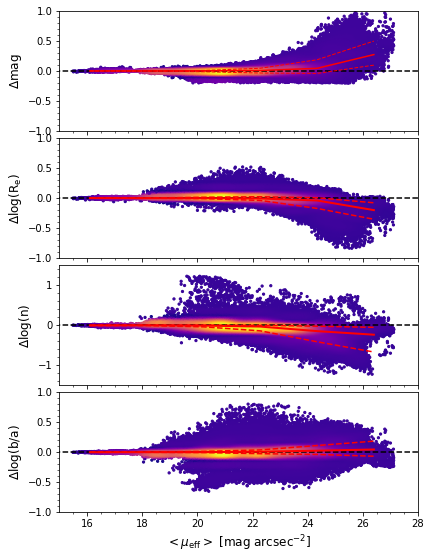

In [9]:
Nbins=6 #please input bin number
fig,ax=plt.subplots(figsize=(6,8))
model=np.loadtxt('model_goodfit')
data=np.loadtxt('data_goodfit')
x0=model[:,1] # input data
y0=model[:,2]
mag0=model[:,3]
re0=model[:,4]
n0=model[:,5]
q0=model[:,6]
pa0=model[:,7]

x1=data[:,1] # output data
y1=data[:,2]
mag1=data[:,3]
re1=data[:,4]
n1=data[:,5]
q1=data[:,6]
pa1=data[:,7]

mu1=mag1+2.5*np.log10(2*q1*np.pi*(re1*0.06)**2)
hist,bin=np.histogram(mu1,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.  # middle values of two adjacent element pair

ax1=plt.subplot(411)
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=(mag1-mag0)[(mu1>=bin[i])&(mu1<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

coeff=np.polyfit(bin_mid,median,9)
poly=np.poly1d(coeff)
data,x,y= np.histogram2d(mu1,mag1-mag0,bins=20,density=True)
z=interpn((0.5*(x[1:]+x[:-1]),0.5*(y[1:]+y[:-1])),data,np.vstack([mu1,mag1-mag0]).T,method='splinef2d',bounds_error=False)
idx=z.argsort()
plt.scatter(mu1[idx],(mag1-mag0)[idx],c=z[idx],s=5,cmap='plasma')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--',lw=1)
plt.plot(bin_mid,sigma16,'r--',lw=1)
plt.plot(bin_mid,median,'r-')
plt.ylabel('$\Delta$mag',fontsize=12)
plt.xlim(15,28)
plt.ylim(-1,1)
ax1.xaxis.set_ticklabels([])
ax1.xaxis.set_minor_locator(plticker.AutoMinorLocator(4))
ax1.xaxis.set_major_locator(plticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax2=plt.subplot(412)
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(re1/re0)[(mu1>=bin[i])&(mu1<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

data,x,y= np.histogram2d(mu1,np.log10(re1/re0),bins=20,density=True)
z=interpn((0.5*(x[1:]+x[:-1]),0.5*(y[1:]+y[:-1])),data,np.vstack([mu1,np.log10(re1/re0)]).T,method='splinef2d',bounds_error=False)
idx=z.argsort()
plt.scatter(mu1[idx],np.log10(re1/re0)[idx],c=z[idx],s=5,cmap='plasma')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.ylabel(r'$\Delta$log(R$_{\rm e}$)',fontsize=12)
plt.xlim(15,28)
plt.ylim(-1.0,1.0)
ax2.xaxis.set_ticklabels([])
ax2.xaxis.set_minor_locator(plticker.AutoMinorLocator(4))
ax2.xaxis.set_major_locator(plticker.MultipleLocator(2))
ax2.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax3=plt.subplot(413)
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(n1/n0)[(mu1>=bin[i])&(mu1<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
 
data,x,y= np.histogram2d(mu1,np.log10(n1/n0),bins=20,density=True)
z=interpn((0.5*(x[1:]+x[:-1]),0.5*(y[1:]+y[:-1])),data,np.vstack([mu1,np.log10(n1/n0)]).T,method='splinef2d',bounds_error=False)
idx=z.argsort()
plt.scatter(mu1[idx],np.log10(n1/n0)[idx],c=z[idx],s=5,cmap='plasma')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.ylabel('$\Delta$log(n)',fontsize=12)
plt.xlim(15,28)
plt.ylim(-1.5,1.5)
ax3.xaxis.set_ticklabels([])
ax3.xaxis.set_minor_locator(plticker.AutoMinorLocator(4))
ax3.xaxis.set_major_locator(plticker.MultipleLocator(2))
ax3.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax4=plt.subplot(414)
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=(q1-q0)[(mu1>=bin[i])&(mu1<=bin[i+1])]
 median=np.append(median,np.mean(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
 
data,x,y= np.histogram2d(mu1,q1-q0,bins=20,density=True)
z=interpn((0.5*(x[1:]+x[:-1]),0.5*(y[1:]+y[:-1])),data,np.vstack([mu1,q1-q0]).T,method='splinef2d',bounds_error=False)
idx=z.argsort()
plt.scatter(mu1[idx],(q1-q0)[idx],c=z[idx],s=5,cmap='plasma')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.ylabel(r'$\Delta$log(b/a)',fontsize=12)
plt.xlabel(r'$ <\mu_{\rm eff}>$ [mag arcsec$^{-2}$]',fontsize=12)
plt.xlim(15,28)
plt.ylim(-1,1)
ax4.xaxis.set_minor_locator(plticker.AutoMinorLocator(4))
ax4.xaxis.set_major_locator(plticker.MultipleLocator(2))
ax4.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

plt.subplots_adjust(left=0.12,right=0.95,top=0.95,bottom=0.08,wspace=0.06,hspace=0.06)
plt.savefig('delta_mu_all.jpg',dpi=120)




In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
import matplotlib.ticker as plticker
from scipy.stats import sigmaclip
Nbins=6

model0=np.loadtxt('model_goodfit')
data0=np.loadtxt('data_goodfit')

mag0=model0[:,3]
re0=model0[:,4]
n0=model0[:,5]
q0=model0[:,6]
pa0=model0[:,7]
mu0=mag0+2.5*np.log10(2*q0*np.pi*(re0*0.06)**2)

mag1=data0[:,3]
re1=data0[:,4]
n1=data0[:,5]
q1=data0[:,6]
pa1=data0[:,7]
mu1=mag1+2.5*np.log10(2*q1*np.pi*(re1*0.06)**2)

n1_range=[0.5,1.5]
n2_range=[1.5,2.5]
n3_range=[2.5,3.5]
n4_range=[3.5,9.0]


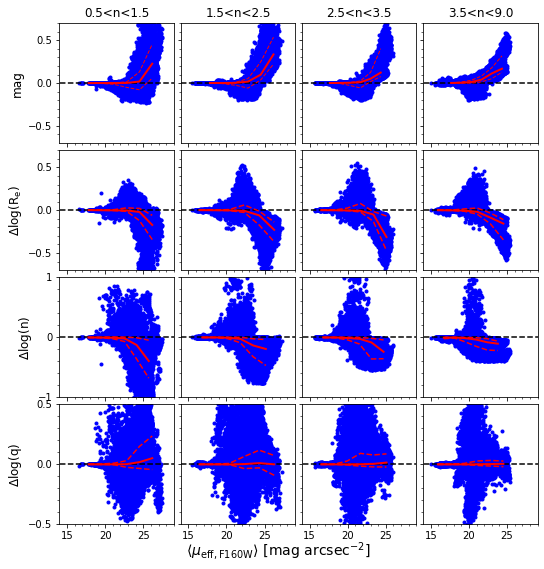

In [22]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(8,8))
fig.text(0.5,0.026,r'$\langle \mu_{\rm eff,F160W}\rangle$ [mag arcsec$^{-2}$]',ha='center',fontsize=14)
ax1=plt.subplot(441)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
mu00=mu0[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,mag11-mag00,'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--',lw=1)
plt.plot(bin_mid,sigma16,'r--',lw=1)
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.ylabel('mag',fontsize=12)
plt.title('{}<n<{}'.format(n1_range[0],n1_range[1]))
plt.xlim(14,29)
plt.ylim(-0.7,0.7)
ax1.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax2=plt.subplot(442)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,mag11-mag00,'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--',lw=1)
plt.plot(bin_mid,sigma16,'r--',lw=1)
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.title('{}<n<{}'.format(n2_range[0],n2_range[1]))
plt.xlim(14,29)
plt.ylim(-0.7,0.7)
ax2.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax2.yaxis.set_ticklabels([])

ax3=plt.subplot(443)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,25))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
 
plt.plot(mu11,mag11-mag00,'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--',lw=1)
plt.plot(bin_mid,sigma16,'r--',lw=1)
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.title('{}<n<{}'.format(n3_range[0],n3_range[1]))
plt.xlim(14,29)
plt.ylim(-0.7,0.7)
ax3.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax3.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax3.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax3.yaxis.set_ticklabels([])

ax4=plt.subplot(444)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,25))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
 
plt.plot(mu11,mag11-mag00,'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--',lw=1)
plt.plot(bin_mid,sigma16,'r--',lw=1)
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.title('{}<n<{}'.format(n4_range[0],n4_range[1]))
plt.xlim(14,29)
plt.ylim(-0.7,0.7)
ax4.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax4.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax4.xaxis.set_ticklabels([])
ax4.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax4.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax4.yaxis.set_ticklabels([])

ax5=plt.subplot(445)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
#print 'panel5:{}'.format(re11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(re11/re00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.ylabel(r'$\Delta$log(R$_{\rm e}$)',fontsize=12)
plt.xlim(14,29)
plt.ylim(-0.7,0.7)
ax5.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax5.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax5.xaxis.set_ticklabels([])
ax5.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax5.yaxis.set_major_locator(plticker.MultipleLocator(0.5))

ax6=plt.subplot(446)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
#print 'panel6:{}'.format(re11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(re11/re00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.7,0.7)
ax6.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax6.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax6.xaxis.set_ticklabels([])
ax6.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax6.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax6.yaxis.set_ticklabels([])

ax7=plt.subplot(447)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
#print 'panel7:{}'.format(re11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(re11/re00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.7,0.7)
ax7.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax7.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax7.xaxis.set_ticklabels([])
ax7.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax7.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax7.yaxis.set_ticklabels([])

ax8=plt.subplot(448)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
#print 'panel8:{}'.format(re11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(re11/re00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.7,0.7)
ax8.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax8.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax8.xaxis.set_ticklabels([])
ax8.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax8.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax8.yaxis.set_ticklabels([])

ax9=plt.subplot(449)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
#print 'panel9:{}'.format(n11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,26.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(n11/n00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.ylabel('$\Delta$log(n)',fontsize=12)
plt.xlim(14,29)
plt.ylim(-1.0,1.0)
ax9.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax9.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax9.xaxis.set_ticklabels([])
ax9.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax9.yaxis.set_major_locator(plticker.MultipleLocator(1))

ax10=plt.subplot(4,4,10)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
#print 'panel10:{}'.format(n11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,26))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(n11/n00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-1.0,1.0)
ax10.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax10.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax10.xaxis.set_ticklabels([])
ax10.yaxis.set_major_locator(plticker.MultipleLocator(1))
ax10.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax10.yaxis.set_ticklabels([])

ax11=plt.subplot(4,4,11)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
#print 'panel11:{}'.format(n11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,25.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(n11/n00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-1.0,1.0)
ax11.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax11.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax11.xaxis.set_ticklabels([])
ax11.yaxis.set_major_locator(plticker.MultipleLocator(1))
ax11.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax11.yaxis.set_ticklabels([])

ax12=plt.subplot(4,4,12)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
#print 'panel12:{}'.format(n11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,24.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(n11/n00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-1.0,1.0)
ax12.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax12.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax12.xaxis.set_ticklabels([])
ax12.yaxis.set_major_locator(plticker.MultipleLocator(1))
ax12.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax12.yaxis.set_ticklabels([])

ax13=plt.subplot(4,4,13)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
#print 'panel13:{}'.format(q11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(q11/q00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.ylabel('$\Delta$log(q)',fontsize=12)
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax13.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax13.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax13.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax13.yaxis.set_major_locator(plticker.MultipleLocator(0.5))

ax14=plt.subplot(4,4,14)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
#print 'panel14:{}'.format(q11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(q11/q00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax14.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax14.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax14.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax14.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax14.yaxis.set_ticklabels([])

ax15=plt.subplot(4,4,15)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
#print 'panel15:{}'.format(q11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(q11/q00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax15.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax15.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax15.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax15.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax15.yaxis.set_ticklabels([])

ax16=plt.subplot(4,4,16)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
#print 'panel16:{}'.format(q11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot(mu11,np.log10(q11/q00),'b.')
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,sigma84,'r--')
plt.plot(bin_mid,sigma16,'r--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax16.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax16.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax16.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax16.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax16.yaxis.set_ticklabels([])

plt.subplots_adjust(left=0.12,right=0.95,top=0.95,bottom=0.08,wspace=0.06,hspace=0.06)
plt.savefig('16_err.jpg',dpi=200)





In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
import matplotlib.ticker as plticker

Nbins=6 #please input bin number

model=np.loadtxt('model_goodfit')
data=np.loadtxt('data_goodfit')

mag0=model[:,3]
re0=model[:,4]
n0=model[:,5]
q0=model[:,6]
pa0=model[:,7]

mag1=data[:,3]
re1=data[:,4]
n1=data[:,5]
q1=data[:,6]
pa1=data[:,7]
mu1=mag1+2.5*np.log10(2*q1*np.pi*(re1*0.06)**2)

n1_range=[0.5,1.5]
n2_range=[1.5,2.5]
n3_range=[2.5,3.5]
n4_range=[3.5,9.0]


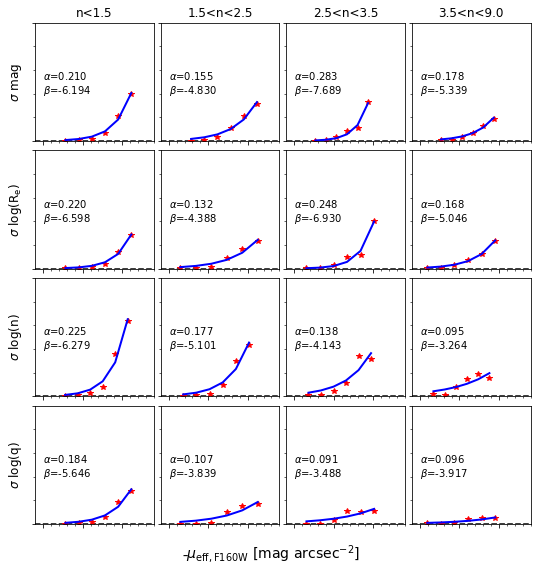

In [28]:
fig,ax=plt.subplots(nrows=4,ncols=4,sharex=True,sharey=True,figsize=(8,8))
#fig.text(0.02,0.5,'$\sigma$ mag',va='center',rotation='vertical',fontsize=14)
fig.text(0.5,0.02,r'$\bar \mu_{\rm eff,F160W}$ [mag arcsec$^{-2}$]',ha='center',fontsize=14)

ax1=plt.subplot(441)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.title('n<{}'.format(n1_range[1]))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
plt.ylabel('$\sigma$ mag',fontsize=12)
ax1.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax2=plt.subplot(442)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.2,r'$\beta$=%5.3f'%(popt[1]))
plt.title('{}<n<{}'.format(n2_range[0],n2_range[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax2.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax2.yaxis.set_ticklabels([])

ax3=plt.subplot(443)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,25))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.2,r'$\beta$=%5.3f'%(popt[1]))
plt.title('{}<n<{}'.format(n3_range[0],n3_range[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax3.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax3.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax3.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax3.yaxis.set_ticklabels([])

ax4=plt.subplot(444)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,25))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.title('{}<n<{}'.format(n4_range[0],n4_range[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax4.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax4.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax4.xaxis.set_ticklabels([])
ax4.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax4.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax4.yaxis.set_ticklabels([])

ax5=plt.subplot(445)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.ylabel(r'$\sigma$ log(R$_{\rm e}$)',fontsize=12)
plt.xlim(14,29)
plt.ylim(0,0.5)
ax5.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax5.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax5.xaxis.set_ticklabels([])
ax5.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax5.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax6=plt.subplot(446)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax6.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax6.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax6.xaxis.set_ticklabels([])
ax6.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax6.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax6.yaxis.set_ticklabels([])

ax7=plt.subplot(447)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax7.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax7.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax7.xaxis.set_ticklabels([])
ax7.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax7.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax7.yaxis.set_ticklabels([])

ax8=plt.subplot(448)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax8.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax8.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax8.xaxis.set_ticklabels([])
ax8.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax8.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax8.yaxis.set_ticklabels([])

ax9=plt.subplot(449)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,26.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.2,r'$\beta$=%5.3f'%(popt[1]))
plt.ylabel('$\sigma$ log(n)',fontsize=12)
plt.xlim(14,29)
plt.ylim(0,0.5)
ax9.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax9.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax9.xaxis.set_ticklabels([])
ax9.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax9.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax10=plt.subplot(4,4,10)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,26))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax10.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax10.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax10.xaxis.set_ticklabels([])
ax10.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax10.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax10.yaxis.set_ticklabels([])

ax11=plt.subplot(4,4,11)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,25.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax11.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax11.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax11.xaxis.set_ticklabels([])
ax11.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax11.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax11.yaxis.set_ticklabels([])

ax12=plt.subplot(4,4,12)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,24.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax12.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax12.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax12.xaxis.set_ticklabels([])
ax12.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax12.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax12.yaxis.set_ticklabels([])

ax13=plt.subplot(4,4,13)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.ylabel('$\sigma$ log(q)',fontsize=12)
plt.xlim(14,29)
plt.ylim(0,0.5)
ax13.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax13.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax13.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax13.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax14=plt.subplot(4,4,14)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.2,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax14.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax14.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax14.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax14.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax14.yaxis.set_ticklabels([])

ax15=plt.subplot(4,4,15)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.20,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax15.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax15.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax15.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax15.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax15.yaxis.set_ticklabels([])

ax16=plt.subplot(4,4,16)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[] # the median of the difference beteween input and output,in each bin
sigma84=[] # the 84 percentile of the difference beteween input and output,in all bins
sigma16=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])] # the list of difference, in each bin
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))

mean_scatter=((sigma84-median)+(median-sigma16))/2.0
def f(x,a,b):
 return 10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,mean_scatter,p0=[1,1])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,mean_scatter,'r*',markersize=6,label='data')
plt.plot(bin_mid,f(bin_mid,*popt),'b-',linewidth=2,label=r'$\alpha$=%5.3f, $\beta$=%5.3f'%tuple(popt))
plt.text(15,0.26,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.2,r'$\beta$=%5.3f'%(popt[1]))
plt.xlim(14,29)
plt.ylim(0,0.5)
ax16.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax16.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax16.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax16.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax16.yaxis.set_ticklabels([])

plt.subplots_adjust(left=0.09,right=0.95,top=0.95,bottom=0.08,wspace=0.06,hspace=0.08)
plt.savefig('16_curve_fit_sigerr.jpg',dpi=200)



In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
import matplotlib.ticker as plticker
from scipy.stats import sigmaclip
from scipy.optimize import curve_fit
Nbins=6

model0=np.loadtxt('model_goodfit')
data0=np.loadtxt('data_goodfit')

mag0=model0[:,3]
re0=model0[:,4]
n0=model0[:,5]
q0=model0[:,6]
pa0=model0[:,7]
mu0=mag0+2.5*np.log10(2*q0*np.pi*(re0*0.06)**2)

mag1=data0[:,3]
re1=data0[:,4]
n1=data0[:,5]
q1=data0[:,6]
pa1=data0[:,7]
mu1=mag1+2.5*np.log10(2*q1*np.pi*(re1*0.06)**2)

n1_range=[0.5,1.5]
n2_range=[1.5,2.5]
n3_range=[2.5,3.5]
n4_range=[3.5,9.0]

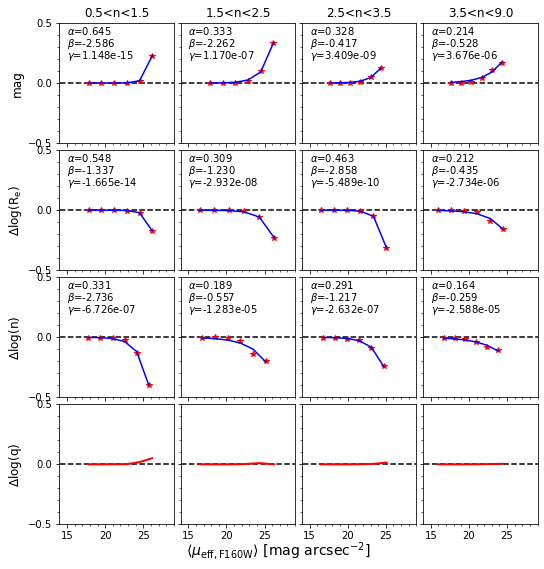

In [38]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(8,8))
fig.text(0.5,0.026,r'$\langle \mu_{\rm eff,F160W}\rangle$ [mag arcsec$^{-2}$]',ha='center',fontsize=14)
ax1=plt.subplot(441)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
mu00=mu0[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.ylabel('mag',fontsize=12)
plt.title('{}<n<{}'.format(n1_range[0],n1_range[1]))
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax1.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))

ax2=plt.subplot(442)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
  return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.title('{}<n<{}'.format(n2_range[0],n2_range[1]))
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax2.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax2.yaxis.set_ticklabels([])

ax3=plt.subplot(443)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,25))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.title('{}<n<{}'.format(n3_range[0],n3_range[1]))
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax3.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax3.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax3.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax3.yaxis.set_ticklabels([])

ax4=plt.subplot(444)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
mag11=mag1[subsample]
mag00=mag0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,25))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma84=[]
sigma16=[]
for i in range(Nbins):
 delta_list=(mag11-mag00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.title('{}<n<{}'.format(n4_range[0],n4_range[1]))
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax4.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax4.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax4.xaxis.set_ticklabels([])
ax4.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax4.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax4.yaxis.set_ticklabels([])

ax5=plt.subplot(445)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
#print 'panel5:{}'.format(re11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.ylabel(r'$\Delta$log(R$_{\rm e}$)',fontsize=12)
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax5.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax5.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax5.xaxis.set_ticklabels([])
ax5.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax5.yaxis.set_major_locator(plticker.MultipleLocator(0.5))

ax6=plt.subplot(446)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
#print 'panel6:{}'.format(re11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax6.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax6.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax6.xaxis.set_ticklabels([])
ax6.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax6.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax6.yaxis.set_ticklabels([])

ax7=plt.subplot(447)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
#print 'panel7:{}'.format(re11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax7.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax7.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax7.xaxis.set_ticklabels([])
ax7.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax7.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax7.yaxis.set_ticklabels([])

ax8=plt.subplot(448)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
re11=re1[subsample]
re00=re0[subsample]
#print 'panel8:{}'.format(re11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(re11/re00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
  return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax8.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax8.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax8.xaxis.set_ticklabels([])
ax8.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax8.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax8.yaxis.set_ticklabels([])

ax9=plt.subplot(449)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,26.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.ylabel('$\Delta$log(n)',fontsize=12)
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax9.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax9.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax9.xaxis.set_ticklabels([])
ax9.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax9.yaxis.set_major_locator(plticker.MultipleLocator(0.5))

ax10=plt.subplot(4,4,10)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
#print 'panel10:{}'.format(n11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,26))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax10.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax10.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax10.xaxis.set_ticklabels([])
ax10.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax10.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax10.yaxis.set_ticklabels([])

ax11=plt.subplot(4,4,11)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
#print 'panel11:{}'.format(n11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,25.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax11.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax11.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax11.xaxis.set_ticklabels([])
ax11.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax11.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax11.yaxis.set_ticklabels([])

ax12=plt.subplot(4,4,12)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
n11=n1[subsample]
n00=n0[subsample]
#print 'panel12:{}'.format(n11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(16,24.5))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(n11/n00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
def f(x,a,b,c):
 return c*10**(a*x+b)
popt,pcov=curve_fit(f,bin_mid,median,p0=[0,0,0])
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r*')
plt.plot(bin_mid,f(bin_mid,*popt),'b-')
plt.text(15,0.4,r'$\alpha$=%5.3f'%(popt[0]))
plt.text(15,0.3,r'$\beta$=%5.3f'%(popt[1]))
plt.text(15,0.2,r'$\gamma$=%1.3e'%(popt[2]))
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax12.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax12.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax12.xaxis.set_ticklabels([])
ax12.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax12.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax12.yaxis.set_ticklabels([])

ax13=plt.subplot(4,4,13)
subsample=(n1<n1_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
#print 'panel13:{}'.format(q11.size)
hist,bin=np.histogram(mu11,bins=Nbins,range=(17,27))
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.ylabel('$\Delta$log(q)',fontsize=12)
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax13.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax13.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax13.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax13.yaxis.set_major_locator(plticker.MultipleLocator(0.5))

ax14=plt.subplot(4,4,14)
subsample=(n1>n2_range[0])&(n1<n2_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax14.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax14.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax14.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax14.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax14.yaxis.set_ticklabels([])

ax15=plt.subplot(4,4,15)
subsample=(n1>n3_range[0])&(n1<n3_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
#print 'panel15:{}'.format(q11.size)
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax15.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax15.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax15.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax15.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax15.yaxis.set_ticklabels([])

ax16=plt.subplot(4,4,16)
subsample=(n1>n4_range[0])&(n1<n4_range[1])
mu11=mu1[subsample]
q11=q1[subsample]
q00=q0[subsample]
hist,bin=np.histogram(mu11,bins=Nbins)
bin_mid=(bin[1:]+bin[:-1])/2.
median=[]
sigma16=[]
sigma84=[]
for i in range(Nbins):
 delta_list=np.log10(q11/q00)[(mu11>=bin[i])&(mu11<=bin[i+1])]
 median=np.append(median,np.median(delta_list))
 sigma84=np.append(sigma84,np.percentile(delta_list,84))
 sigma16=np.append(sigma16,np.percentile(delta_list,16))
plt.plot([12,35],[0,0],'k--')
plt.plot(bin_mid,median,'r-',linewidth=2)
plt.xlim(14,29)
plt.ylim(-0.5,0.5)
ax16.xaxis.set_major_locator(plticker.MultipleLocator(5))
ax16.xaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax16.yaxis.set_major_locator(plticker.MultipleLocator(0.5))
ax16.yaxis.set_minor_locator(plticker.AutoMinorLocator(5))
ax16.yaxis.set_ticklabels([])

plt.subplots_adjust(left=0.12,right=0.95,top=0.95,bottom=0.08,wspace=0.06,hspace=0.06)
plt.savefig('16_curve_fit_biaserr.jpg',dpi=200)


